In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import plotly.graph_objects as go 
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits  
from sklearn.decomposition import PCA

In [135]:
iris = sns.load_dataset('iris')
# iris.describe()
iris["species"].value_counts() # 이거 많이씀. 종류별 빈도수. -> 개수가 50개씩같은데 이때 클래스가 균형이 맞아야함. 
                                                               #그렇지 않으면 클래스 임발란스가 되는데이러면 성능이 떨어짐!

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [136]:
setosa = iris[iris['species'] == "setosa"]
versicolor = iris[iris['species'] == "versicolor"]
virginica = iris[iris['species'] == "virginica"]

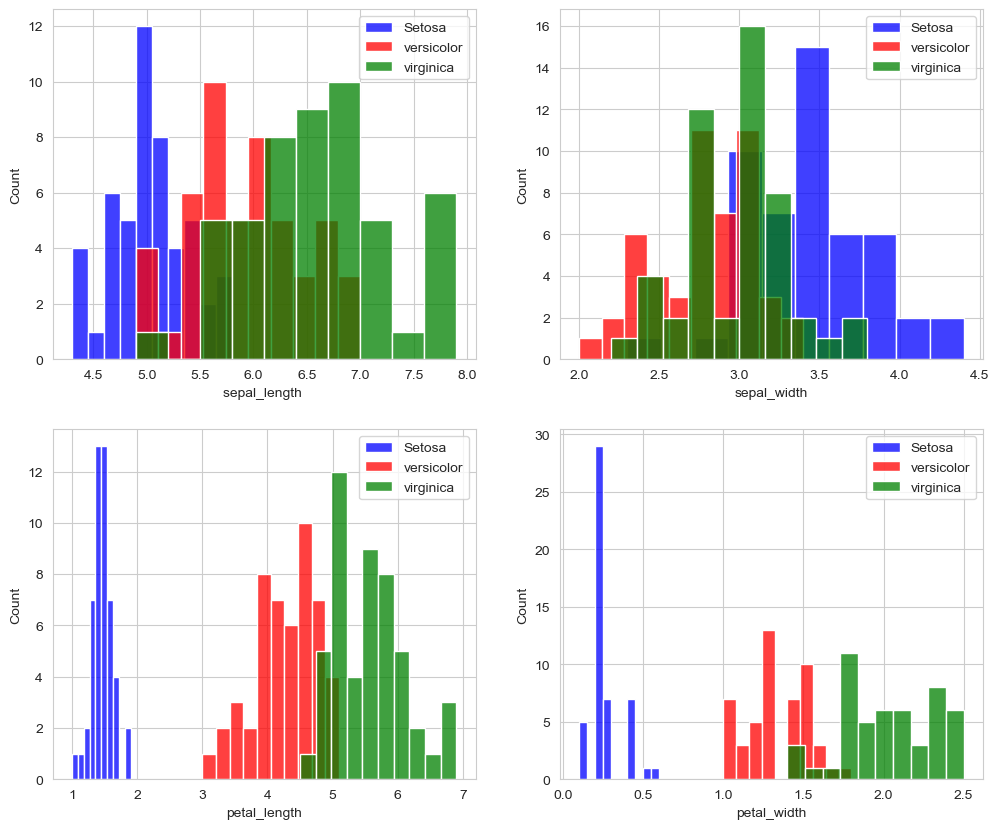

In [137]:
# 특징별 히스토그램 작성
sns.set_style("whitegrid")
fig = plt.figure(figsize = (12,10))
ax_01 = fig.add_subplot(221)
ax_02 = fig.add_subplot(222)
ax_03 = fig.add_subplot(223)
ax_04 = fig.add_subplot(224)

sns.histplot(setosa["sepal_length"] , bins = 10 , ax = ax_01 , color = "blue", label ="Setosa")
sns.histplot(versicolor["sepal_length"] , bins = 10 , ax = ax_01 , color = "red", label ="versicolor")
sns.histplot(virginica["sepal_length"] , bins = 10 , ax = ax_01 , color = "green", label ="virginica")

sns.histplot(setosa["sepal_width"] , bins = 10 , ax = ax_02 , color = "blue", label ="Setosa")
sns.histplot(versicolor["sepal_width"] , bins = 10 , ax = ax_02 , color = "red", label ="versicolor")
sns.histplot(virginica["sepal_width"] , bins = 10 , ax = ax_02 , color = "green", label ="virginica")

sns.histplot(setosa["petal_length"] , bins = 10 , ax = ax_03 , color = "blue", label ="Setosa")
sns.histplot(versicolor["petal_length"] , bins = 10 , ax = ax_03 , color = "red", label ="versicolor")
sns.histplot(virginica["petal_length"] , bins = 10 , ax = ax_03 , color = "green", label ="virginica")

sns.histplot(setosa["petal_width"] , bins = 10 , ax = ax_04 , color = "blue", label ="Setosa")
sns.histplot(versicolor["petal_width"] , bins = 10 , ax = ax_04 , color = "red", label ="versicolor")
sns.histplot(virginica["petal_width"] , bins = 10 , ax = ax_04 , color = "green", label ="virginica")

ax_01.set_xlabel("sepal_length ")
ax_02.set_xlabel("sepal_width")
ax_03.set_xlabel("petal_length")
ax_04.set_xlabel("petal_width")

ax_01.legend()
ax_02.legend()
ax_03.legend()
ax_04.legend()
plt.show()

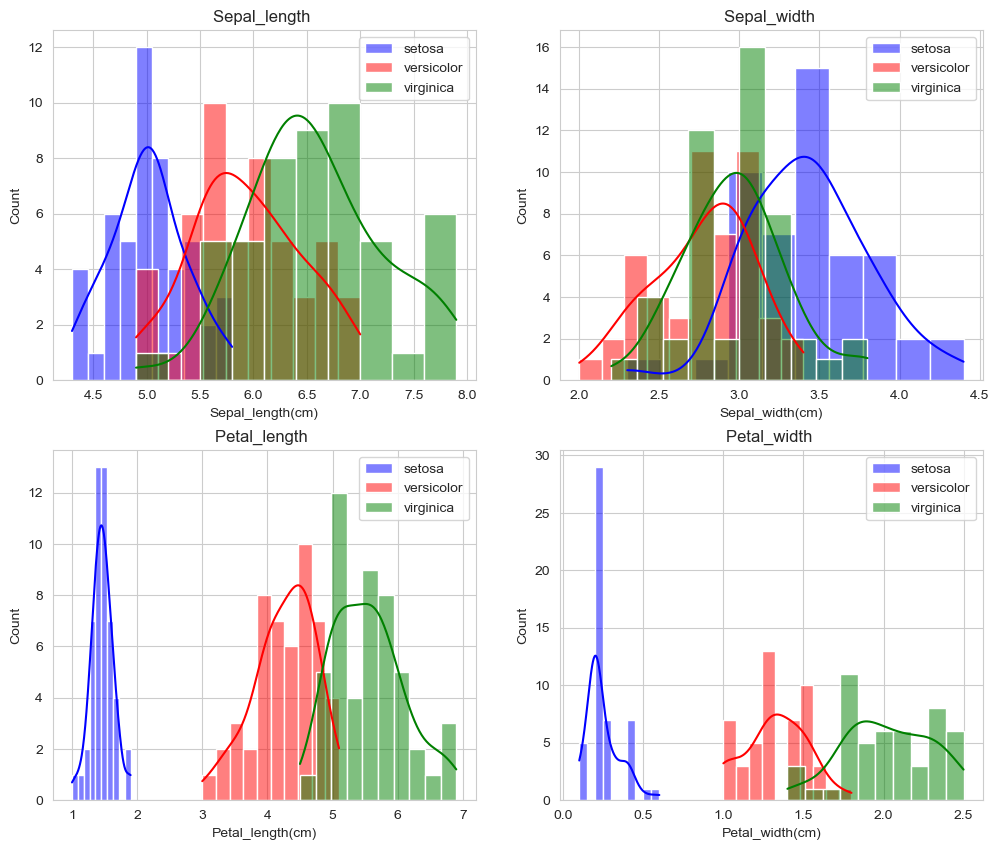

In [139]:
 sns.set_style("whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
colors = ["blue", "red", "green"]

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    for j, species in enumerate(iris["species"].unique()):
        sns.histplot(
            iris[iris["species"] == species] [feature],
            bins=10,
            ax=ax,
            color=colors[j],
            kde=True,
            label=species
        )

    ax.set_xlabel(feature.capitalize() + "(cm)")
    
axs[0,0].set_title("Sepal_length ")
axs[0,0].legend() 
axs[0,1].set_title("Sepal_width ")
axs[0,1].legend() 
axs[1,0].set_title("Petal_length ")
axs[1,0].legend() 
axs[1,1].set_title("Petal_width ")
axs[1,1].legend() 
plt.show()

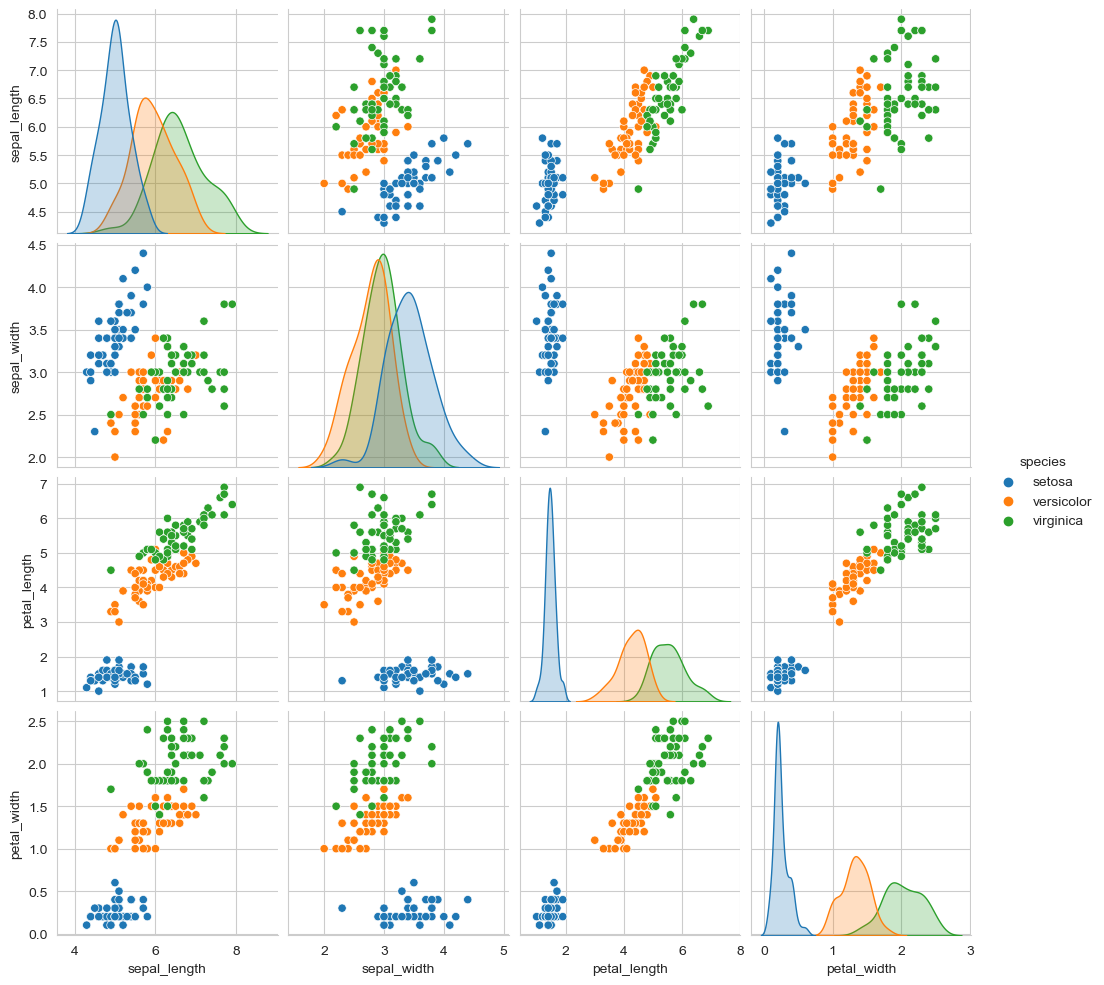

In [91]:
#페어 플롯

iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species') 

<Axes: >

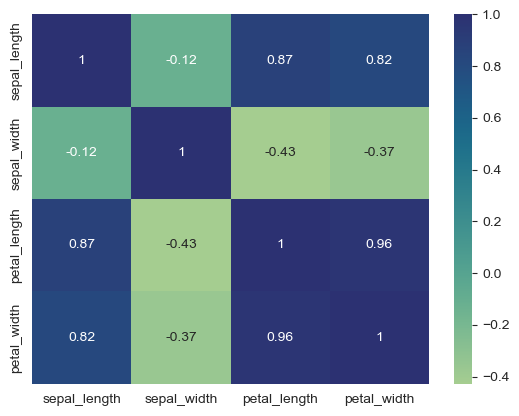

In [83]:
#상관관계 (Heatmap)
sns.heatmap(data = iris.corr(numeric_only = True),
           cmap = "crest",
           cbar = True,
           annot = True)
# Setosa 는 Versicolor , Virginica 와 구분된다.
# Versicolor는 Virginica 은 겹치는 영역이 존재한다.
# Petal length, petal_width 가 가장 강한 상관관계를 보였다.  

In [141]:
#타이타닉 데이터 셋
titanic = sns.load_dataset("titanic")
# titanic

#데이터 프레임 통계 정보 
# titanic.describe()

#결측치확인
# titanic.isna().sum()

#결측치 채우기
# titanic["age"] = titanic["age"].fillna(titanic["age"].median) 
# titanic["age"].isna().sum()

In [140]:
titanic["embark_town"].value_counts()
titanic["embark_town"] = titanic["embark_town"].fillna('Southampton') 
titanic["embark_town"].isna().sum()

0

In [107]:
titanic["deck"].value_counts() 
titanic["deck"] = titanic["deck"].fillna('C') 
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [109]:
#데이터 기본정보
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    object  
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(1), int64(4), object(6)
memory usage: 80.7+ KB


In [116]:
#생존사 및 사망자 수확인
# titanic[titanic["survived"] ==0]
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [117]:
#선실별 생존자 분석
titanic.groupby("class").count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,216,216,216,216,216,216,216,216,216,216,216
Second,184,184,184,184,184,184,184,184,184,184,184,184,184,184
Third,491,491,491,491,491,491,491,491,491,491,491,491,491,491


In [118]:
#생존률 확인 
titanic.pivot_table(index = 'class' , columns = 'who' , values = "survived") 

who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


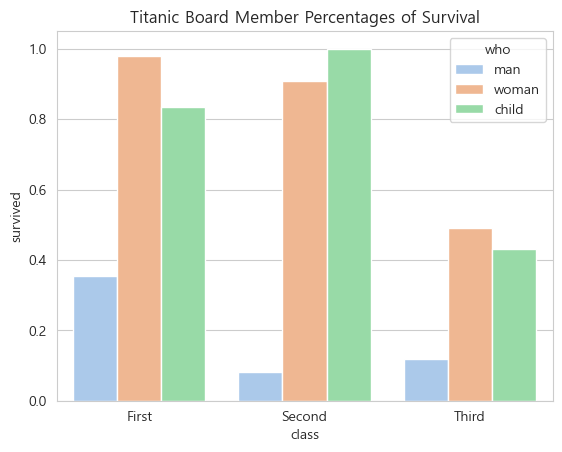

In [133]:
sns.set_style("whitegrid")
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
 
sns.barplot(x = 'class' ,
            y = 'survived' ,
            data=titanic,
            palette="pastel",
            errorbar=None,
            hue="who")

plt.title("Titanic Board Member Percentages of Survival")
plt.show()

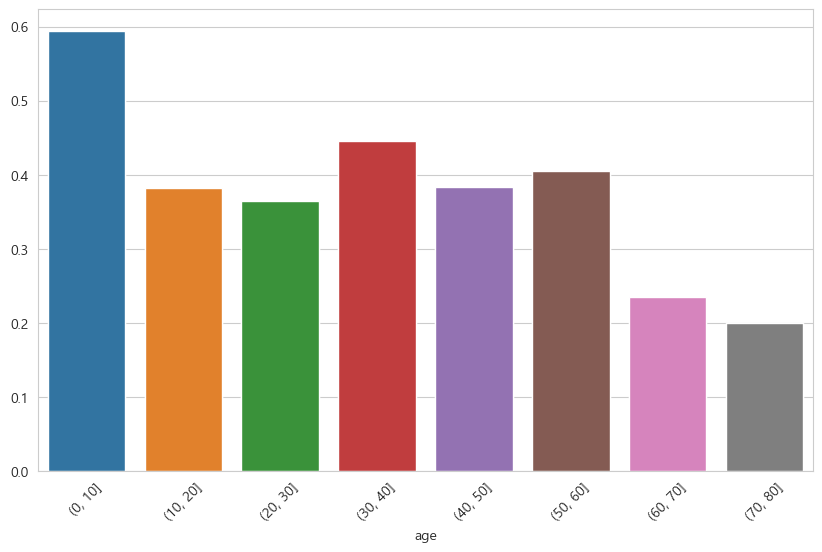

In [157]:
#나이별 생존률 

age_survival_rate = titanic.groupby(pd.cut(titanic["age"] ,
                                           bins = [0,10,20,30,40,50,60,70,80]))["survived"].mean()
# age_survival_rate

plt.figure(figsize = (10,6))
sns.barplot(x = age_survival_rate.index , y = age_survival_rate.values)
 
# ax = sns.barplot(x=age_survival_rate.index, y=age_survival_rate.values)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

In [ ]:
#실습
# df = pd.read_csv('C:/Users/carlo/Desktop/AI_CWNU/documents/movies.dat',sep="::", engine="python")
# df
movies = pd.read_table('C:/Users/carlo/Desktop/AI_CWNU/documents/movies.dat',sep="::",
                   header =None ,
                   names=["MovieID" , "Title" , "Genres"] ,
                   engine ="python")

users = pd.read_table('C:/Users/carlo/Desktop/AI_CWNU/documents/users.dat',sep="::",
                   header =None ,
                   names=["UserID" , "Gender" , "Age" , "Occupation" , "Zip-code"] ,
                   engine ="python")

ratings = pd.read_table('C:/Users/carlo/Desktop/AI_CWNU/documents/ratings.dat',sep="::",
                   header =None ,
                   names=[ "UserID","MovieID" , "Rating" , "Timestamp" ],
                   engine ="python")
                                      
users


In [50]:
# 교수님이 하신것 
# 성별별로 가장 평점이 높은 영화 탑 5를 뽑아라 . (탑 5는 최소 250 한테 받아야함 ) 

data  = pd.merge(pd.merge(ratings,users) , movies)  # 다 합쳐줌 ratings, users, movies -> data 로 
data

filter250 = data.groupby("Title").size() # 조건, 최소 250개인걸 확인하기위해 Title 별로 정렬한뒤에 그것의 개수 파악. 
title250 = filter250[filter250 >=250].index

# data.pivot_table(? , index = , columns =  ?) #이런식으로 들어감
mean_rating = data.pivot_table("Rating" , index = "Title" , columns =  "Gender").loc[title250] 
                                                                    #통계내고싶은값, index = 제목 , 종류 = 성별 
                                                                    #pivot 테이블을 보면 default값이 평균값을 보여줌. 
mean_rating.sort_values(by="F",ascending=False).head() #여성들 상위 5개 . 

Gender,F,M
Title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [23]:
# 해석 
# 교수님이 하신것 
# 성별별로 가장 평점이 높은 영화 탑 5를 뽑아라 . (탑 5는 최소 250 한테 받아야함 ) 

data  = pd.merge(pd.merge(ratings,users) , movies)  # 다 합쳐줌 ratings, users, movies -> data 로 
data
# 	UserID	MovieID	Rating	Timestamp	Gender	Age	Occupation	Zip-code	Title	Genres
# 0	1	1193	5	978300760	F	1	10	48067	One Flew Over the Cuckoo's Nest (1975)	Drama
# 1	2	1193	5	978298413	M	56	16	70072	One Flew Over the Cuckoo's Nest (1975)	Drama
# 2	12	1193	4	978220179	M	25	12	32793	One Flew Over the Cuckoo's Nest (1975)	Drama
# 3	15	1193	4	978199279	M	25	7	22903	One Flew Over the Cuckoo's Nest (1975)	Drama
# 4	17	1193	5	978158471	M	50	1	95350	One Flew Over the Cuckoo's Nest (1975)	Drama

data.groupby("Title").size() # 조건, 최소 250개인걸 확인하기위해 Title 별로 정렬한뒤에 그것의 개수 파악. 
# Title
# $1,000,000 Duck (1971)                         37
# 'Night Mother (1986)                           70
# 'Til There Was You (1997)                      52
# 'burbs, The (1989)                            303
# ...And Justice for All (1979)                 199


filter250 = data.groupby("Title").size() # 조건, 최소 250개인걸 확인하기위해 Title 별로 정렬한뒤에 그것의 개수 파악. 
title250 = filter250[filter250 >=250].index
# Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
#        '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
#        '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
#        '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
#        '2010 (1984)',
#        ...


# data.pivot_table(? , index = , columns =  ?) #이런식으로 들어감
# data.pivot_table("Rating" , index = "Title" , columns =  "Gender")  #통계내고싶은값, index = 제목 , 종류 = 성별 
                                                                    #pivot 테이블을 보면 default값이 평균값을 보여줌. 
    


In [24]:
# 내가 시도. 
# 성별별로 가장 평점이 높은 영화 탑 5를 뽑아라 . (탑 5는 최소 250 한테 받아야함 ) 
ratings1 = ratings[["UserID", "Rating" ,"MovieID"]]
women = users[["UserID","Gender"]]
movie = movies[["MovieID","Title"]]
 

merged_df1 = pd.merge(ratings1 , women , on="UserID" ) 
merged_df  = pd.merge(merged_df1 , movie , on="MovieID") 
merged_df 
 

gender_movie_ratings = merged_df.groupby(['Gender', 'UserID'])['Rating'].mean()
 
fm = gender_movie_ratings.loc['F'].sort_values().tail()
mm = gender_movie_ratings.loc['M'].sort_values().tail()


print("여성들이 가장 선호하는 영화 TOP 5" , )
print(fm.sort_values(ascending=False))

print("남성들이 가장 선호하는 영화 TOP 5" , )
print(mm.sort_values(ascending=False))

여성들이 가장 선호하는 영화 TOP 5
UserID
2339    4.956522
446     4.843137
447     4.837838
4925    4.761905
4755    4.760000
Name: Rating, dtype: float64
남성들이 가장 선호하는 영화 TOP 5
UserID
283     4.962963
3324    4.904762
3902    4.890909
4649    4.818182
4634    4.813725
Name: Rating, dtype: float64


In [51]:
# 연령별로 가장 평점이 높은 영화 탑 5를 뽑아라 . (탑 5는 최소 250 한테 받아야함 )
# 1 -> under 18 , 
columns =  "Gender" 이걸 Gender 대신 Age로 하면 됨

In [72]:

#년도별 출생 미국
dfs = [] #df 를 다 담을 리스트
for y in range (1880,2011):
    df = pd.read_csv("C:/Users/carlo/Desktop/AI_CWNU/documents/babynames/babynames/yob"+str(y)+".txt",
                           names=["name","gender","births"])
    df["year"] = y                 # year 별로 넣기 . 
    dfs.append(df)
names =pd.concat(dfs)  
names

#이런걸로 년도별 출생추이 같은걸 확인가능. 


,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [89]:
#이름 끝자리 알파벳이 e 인것. 
 
#맨마지막 끝자리  구하기 방법1
# last_letter = names["name"].map(lambda x : x[-1]) 
#맨마지막 끝자리  구하기 방법2
last_letter = names["name"].str[-1] 

names.pivot_table("births" , index = last_letter , columns = "year" , aggfunc="sum") #이렇게하면 기본적으로 평균이 되버림. 
                                    # aggfunc 을 sum 으로 바꿔줌

    
#만약 남자 아이하고 여자아이따로 나누고 싶다. -> 2중컬럼 만들어줌 

names.pivot_table("births" , index = last_letter , columns = ["gender","year"] , aggfunc="sum")
                                    # aggfunc 을 sum 으로 바꿔줌


gender        F                                                        \
year       1880     1881     1882     1883     1884     1885     1886   
name                                                                    
a       31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c           NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d         609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e       33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g           7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h        4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i          61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k          13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l        2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m          58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n        3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o          30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r         481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s        1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t        2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u         380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w           NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x           NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y       10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z         106.0     95.0    106.0    141.0    148.0    150.0    202.0   

gender                             ...         M                      \
year       1887     1888     1889  ...      2001      2002      2003   
name                               ...                                 
a       48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b           NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c           NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d        1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e       54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f           NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g          25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h        7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i         105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j           NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k          19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l        6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m          90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n        5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o          97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p           NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q           NaN      NaN      NaN  ...     602.0     618.0     585.0   
r         910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s        2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t        3140.0   3816.0   3784.0  ...   47688.0   44991.0   43765.0   
u         476.0    541.0    469.0  ...    1833.0    1819.0    2052.0   
v           NaN      NaN      NaN  ...    1209.0    1332.0    1652.0   
w           NaN      NaN      NaN  ...   52265.0   50103.0   49079.0   
x         

In [107]:
#많이사용됬던 마지막글자 총합 
last_names = names.pivot_table("births" , index = last_letter , columns = ["gender","year"] , aggfunc="sum")
last_names.sum(axis=1).sort_values(ascending=False) #a~z 까지 년도다합친 합 

#근데 여기서 남녀 또 나누고 싶다. 

last_names.loc[: , "F"]  # 이렇게하면 여성만 나옴  그래서 변수안에 넣음 

#만약 여기서 1개의 년도만 보고싶다면
# last_names.loc[: , "F"].loc[: , 1880]  


# 그리고 더하면  여성 이름 상위 5개 맨끝자리가 끝난것중 제일 많은것. 
last_names.loc[: , "F"].sum(axis=1).sort_values(ascending=False)

# 이건 남성것
# last_names.loc[: , "M"].sum(axis=1).sort_values(ascending=False)


name
a    54115030.0
e    35462607.0
y    23621391.0
n    18717469.0
h     7378398.0
l     5570940.0
r     3704275.0
s     3582147.0
i     3522803.0
t     2386840.0
d      736531.0
m      400887.0
o      396800.0
z      135283.0
u       83091.0
k       37210.0
w       32824.0
g       32653.0
x       25271.0
c       22724.0
b       14130.0
p        4091.0
v        2633.0
j        2358.0
f        1455.0
q         299.0
dtype: float64

<Axes: xlabel='name'>

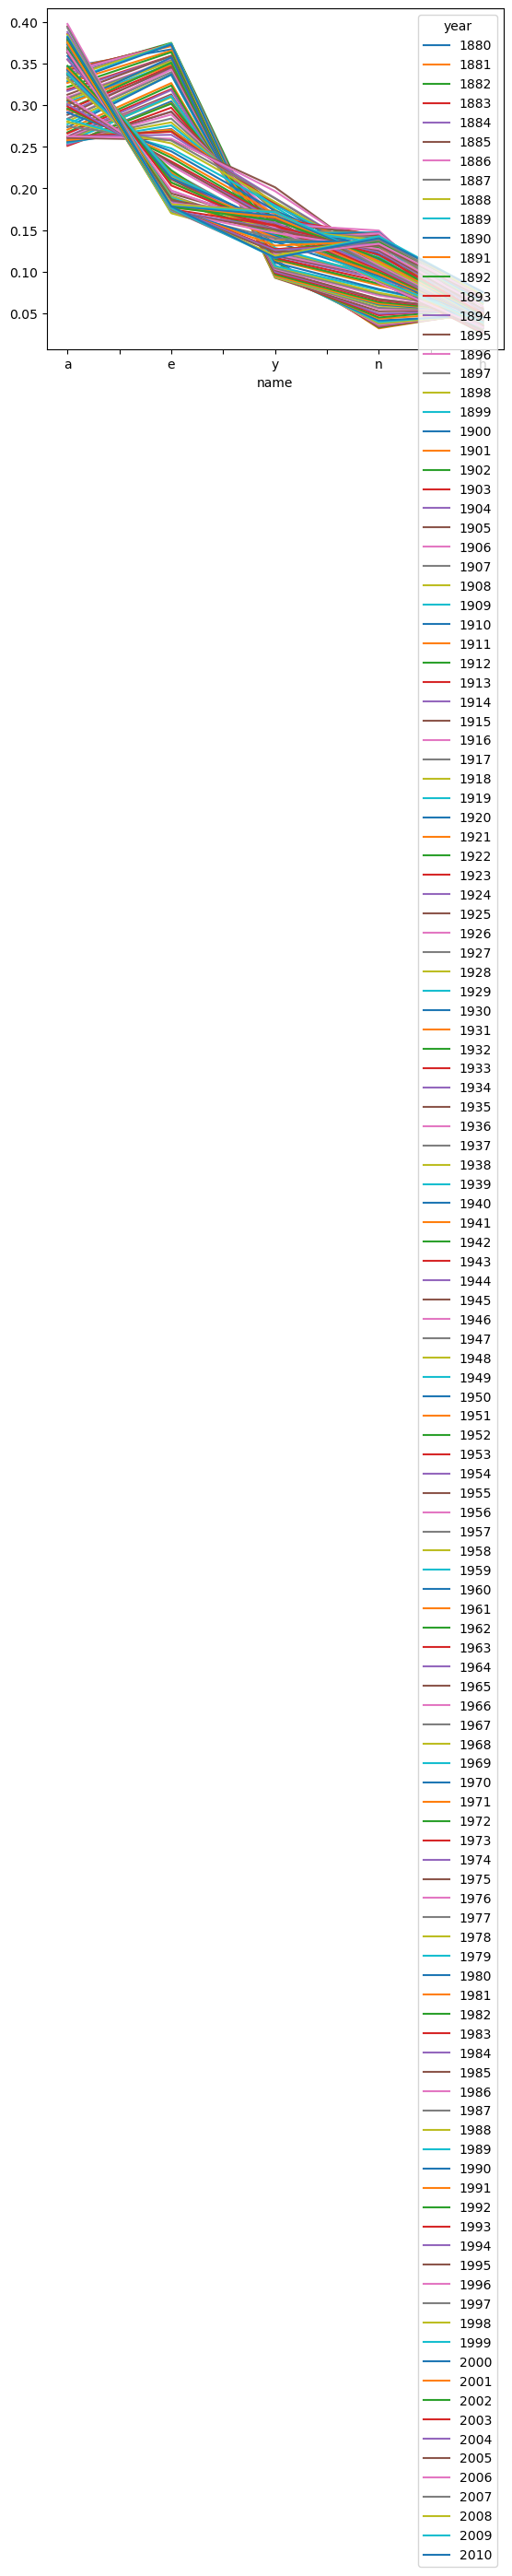

In [124]:

F= last_names.loc[: , "F"] #여자아이 출생수  그래서 이걸구하면 아까 구한거를 나눠주면 % 가됨 
    # % 를쓰는 이유는  크기로해보이면 잘안보일수있기때문에

top5_F = F.sum(axis=1).sort_values(ascending=False).index[:5] 
(F/F.sum()).loc[top5_F].plot()  #이렇게만보면 추이가 안보이니 plot( ) 해줘야함 이걸 뒤집어주는 걸 

<Axes: xlabel='year'>

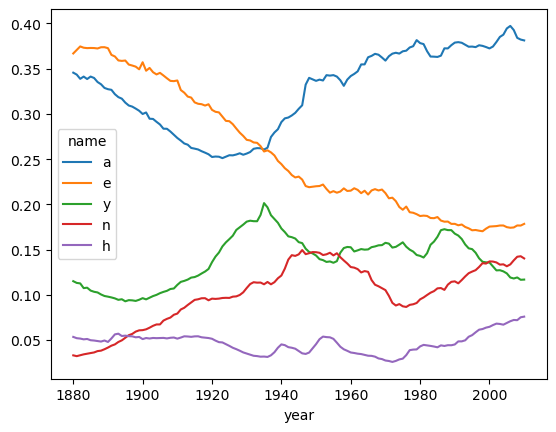

In [125]:
(F/F.sum()).loc[top5_F].T.plot()  #이렇게 해주면됨 (T를 써서 해주면됨. )

<Axes: xlabel='year'>

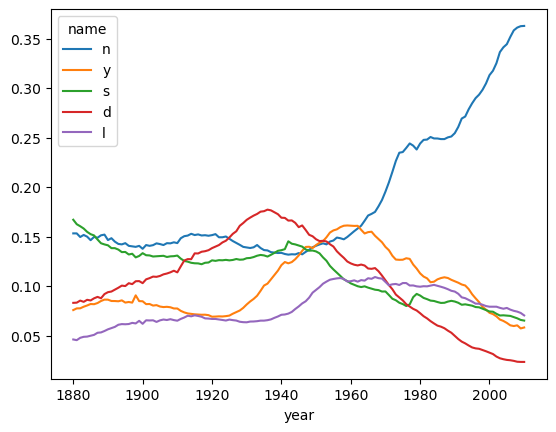

In [127]:
# 남자아이 통계

F= last_names.loc[: , "M"] 
top5_F = F.sum(axis=1).sort_values(ascending=False).index[:5] 
(F/F.sum()).loc[top5_F].T.plot() 

#이런거 딱 데이터 받을때, 어떻게 시작해야할지 모르는데, 그목표로하는걸 거꾸로 설계하면서 내려오면됨. ★★★★★
